In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import yahist
import itertools

plt.rcParams.update({"figure.facecolor":  (1,1,1,0)})

from utils.analysis import Optimization

TAG = "pku"

In [2]:
presort_babies = sorted(glob.glob(f"../analysis/studies/vbswh/output_{TAG}/Run2/*.root"))
presort_babies = [baby for baby in presort_babies if "data" not in baby]
babies = []
for baby in sorted(presort_babies, reverse=True):
    if "EWK" in baby.split("/")[-1]:
        babies.append(baby)
    else:
        babies.insert(0, baby)
        
for baby_i, baby in enumerate(babies):
    if "VBSWH_SM" in baby.split("/")[-1] in baby:
        babies.append(babies.pop(baby_i))
        break
babies

['../analysis/studies/vbswh/output_pku/Run2/Bosons.root',
 '../analysis/studies/vbswh/output_pku/Run2/SingleTop.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTX.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar1L.root',
 '../analysis/studies/vbswh/output_pku/Run2/TTbar2L.root',
 '../analysis/studies/vbswh/output_pku/Run2/VBSWH_mkW.root',
 '../analysis/studies/vbswh/output_pku/Run2/VH.root',
 '../analysis/studies/vbswh/output_pku/Run2/WJets.root',
 '../analysis/studies/vbswh/output_pku/Run2/EWKWLep.root',
 '../analysis/studies/vbswh/output_pku/Run2/VBSWH_SM.root']

In [3]:
vbswh = Optimization(
    sig_root_files=[baby for baby in babies if "VBSWH_mkW" in baby],
    bkg_root_files=[baby for baby in babies if "VBSWH_mkW" not in baby],
    ttree_name="tree",
    weight_columns=[
        "xsec_sf", "lep_id_sf", 
        "elec_reco_sf", "muon_iso_sf", 
        "btag_sf", "pu_sf", "prefire_sf", "trig_sf"
    ],
    plots_dir=f"/home/users/jguiang/public_html/vbswh_plots/{TAG}/opt"
)
vbswh.df["presel_noVBS_noBVeto"] = vbswh.df.eval(
    "hbbjet_score > 0.3"
)
vbswh.df["presel_noVBS"] = vbswh.df.eval(
    "passes_bveto and hbbjet_score > 0.3"
)
vbswh.df["presel_noDetaJJ"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and hbbjet_score > 0.3"
)
vbswh.df["presel"] = vbswh.df.eval(
    "passes_bveto and M_jj > 500 and abs(deta_jj) > 3 and hbbjet_score > 0.3"
)
# vbswh.df["SR"] = vbswh.df.eval(
#     "presel and ST > 1200 and M_jj > 1500 and abs(deta_jj) > 4 and hbbjet_score > 0.9 and hbbjet_msoftdrop < 150"
# )
vbswh.df["SR2"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 1500 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop < 150"
)
vbswh.df["regionA"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionB"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop >= 150"
)
vbswh.df["regionC"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) <= 4 and hbbjet_msoftdrop < 150"
)
vbswh.df["SR1"] = vbswh.df.eval(
    "presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9 and abs(deta_jj) > 4 and hbbjet_msoftdrop < 150"
)
# vbswh.make_selection("passes_bveto == True")
# vbswh.make_selection("passes_bveto != True")

Loading bkg babies: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:22<00:00,  2.51s/it]


In [4]:
# selection = "(regionA or regionB)"
# bins = np.linspace(0, 10, 11)

# fig = plt.figure(figsize=(6.4*1.5, 4.8*1.25*1.5))
# gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=[2, 0.65], hspace=0.1)
# hist_axes = fig.add_subplot(gs[0])
# ratio_axes = fig.add_subplot(gs[1])


# tt1l_df = vbswh.bkg_df(selection=f"{selection} and name == 'TTbar1L'")
# tt2l_df = vbswh.bkg_df(selection=f"{selection} and name == 'TTbar2L'")
# wjets_df = vbswh.bkg_df(selection=f"{selection} and name == 'WJets'")

# tt1l_hist = yahist.Hist1D(
#     np.abs(tt1l_df.deta_jj.values),
#     bins=bins,
#     color="b",
#     label="TTbar1L"
# ).normalize()
# tt2l_hist = yahist.Hist1D(
#     np.abs(tt2l_df.deta_jj.values),
#     bins=bins,
#     color="r",
#     label="TTbar2L"
# ).normalize()
# wjets_hist = yahist.Hist1D(
#     np.abs(wjets_df.deta_jj.values),
#     bins=bins,
#     color="m",
#     label="W+Jets"
# ).normalize()
# ratio_hist = tt1l_hist/tt2l_hist

# tt2l_hist.plot(ax=hist_axes, errors=True)
# tt1l_hist.plot(ax=hist_axes, errors=True)
# wjets_hist.plot(ax=hist_axes, errors=True)
# (tt2l_hist/tt1l_hist).plot(ax=ratio_axes, errors=True, color="k", label="TTbar2L/TTbar1L")
# (wjets_hist/tt1l_hist).plot(ax=ratio_axes, errors=True, color="grey", label="W+Jets/TTbar1L")

# hist_axes.set_ylabel("a.u.", size=18)
# hist_axes.set_title("Region A + Region B", size=18);

# ratio_axes.axhline(y=1, color="k", linestyle="--", alpha=0.75, linewidth=0.75)
# # ratio_axes.legend().remove()
# ratio_axes.set_ylabel("TTbar1L/TTbar2L", size=14);
# ratio_axes.set_xlabel(r"$|\Delta\eta_{jj}|$", size=18);

In [5]:
# selection = "(regionC or SR1)"
# bins = np.linspace(0, 10, 11)

# fig = plt.figure(figsize=(6.4*1.5, 4.8*1.25*1.5))
# gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig, height_ratios=[2, 0.65], hspace=0.1)
# hist_axes = fig.add_subplot(gs[0])
# ratio_axes = fig.add_subplot(gs[1])


# tt1l_df = vbswh.bkg_df(selection=f"{selection} and name == 'TTbar1L'")
# tt2l_df = vbswh.bkg_df(selection=f"{selection} and name == 'TTbar2L'")
# wjets_df = vbswh.bkg_df(selection=f"{selection} and name == 'WJets'")

# tt1l_hist = yahist.Hist1D(
#     np.abs(tt1l_df.deta_jj.values),
#     bins=bins,
#     color="b",
#     label="TTbar1L"
# ).normalize()
# tt2l_hist = yahist.Hist1D(
#     np.abs(tt2l_df.deta_jj.values),
#     bins=bins,
#     color="r",
#     label="TTbar2L"
# ).normalize()
# wjets_hist = yahist.Hist1D(
#     np.abs(wjets_df.deta_jj.values),
#     bins=bins,
#     color="m",
#     label="W+Jets"
# ).normalize()
# ratio_hist = tt1l_hist/tt2l_hist

# tt2l_hist.plot(ax=hist_axes, errors=True)
# tt1l_hist.plot(ax=hist_axes, errors=True)
# wjets_hist.plot(ax=hist_axes, errors=True)
# (tt2l_hist/tt1l_hist).plot(ax=ratio_axes, errors=True, color="k", label="TTbar2L/TTbar1L")
# (wjets_hist/tt1l_hist).plot(ax=ratio_axes, errors=True, color="grey", label="W+Jets/TTbar1L")

# hist_axes.set_ylabel("a.u.", size=18)
# hist_axes.set_title("Region C + Region D (SR1)", size=18);

# ratio_axes.axhline(y=1, color="k", linestyle="--", alpha=0.75, linewidth=0.75)
# # ratio_axes.legend().remove()
# ratio_axes.set_ylabel("TTbar1L/TTbar2L", size=14);
# ratio_axes.set_xlabel(r"$|\Delta\eta_{jj}|$", size=18);

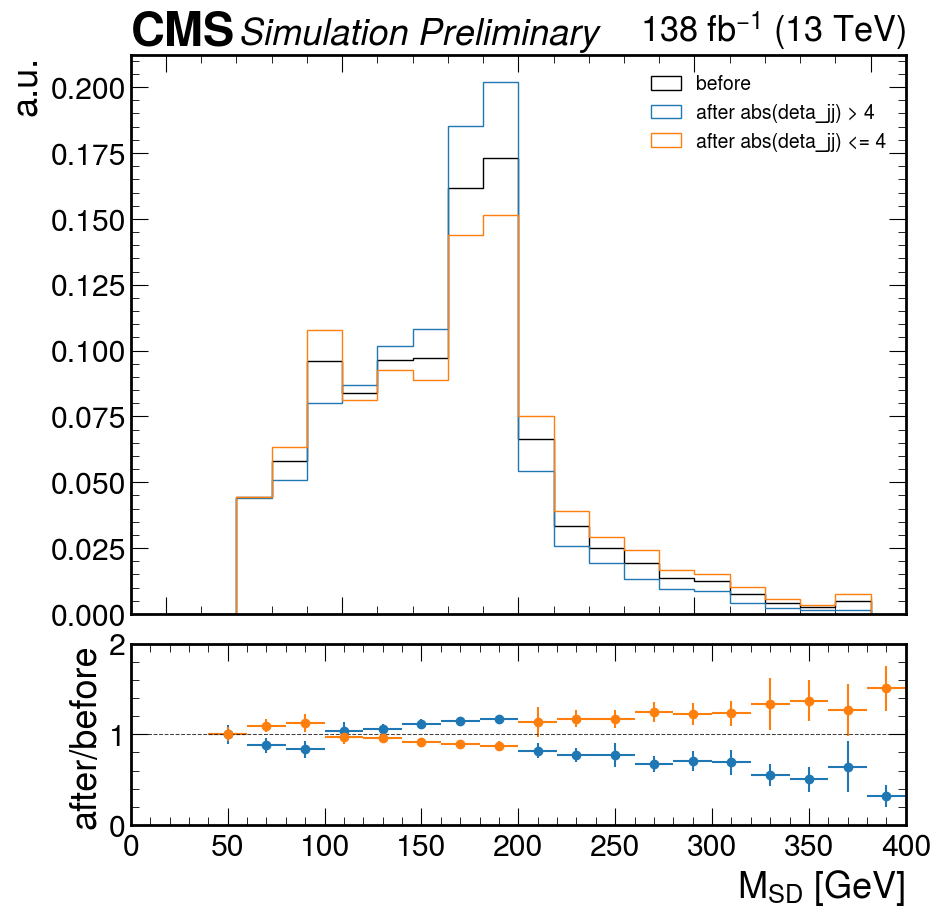

In [6]:
vbswh.plot_correlation(
    "hbbjet_msoftdrop", 
    np.linspace(0, 400, 21), 
    selections=[
        "abs(deta_jj) > 4",
        "abs(deta_jj) <= 4"
    ],
    base_selection="presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9",
    x_label="$M_{SD}$ [GeV]",
);

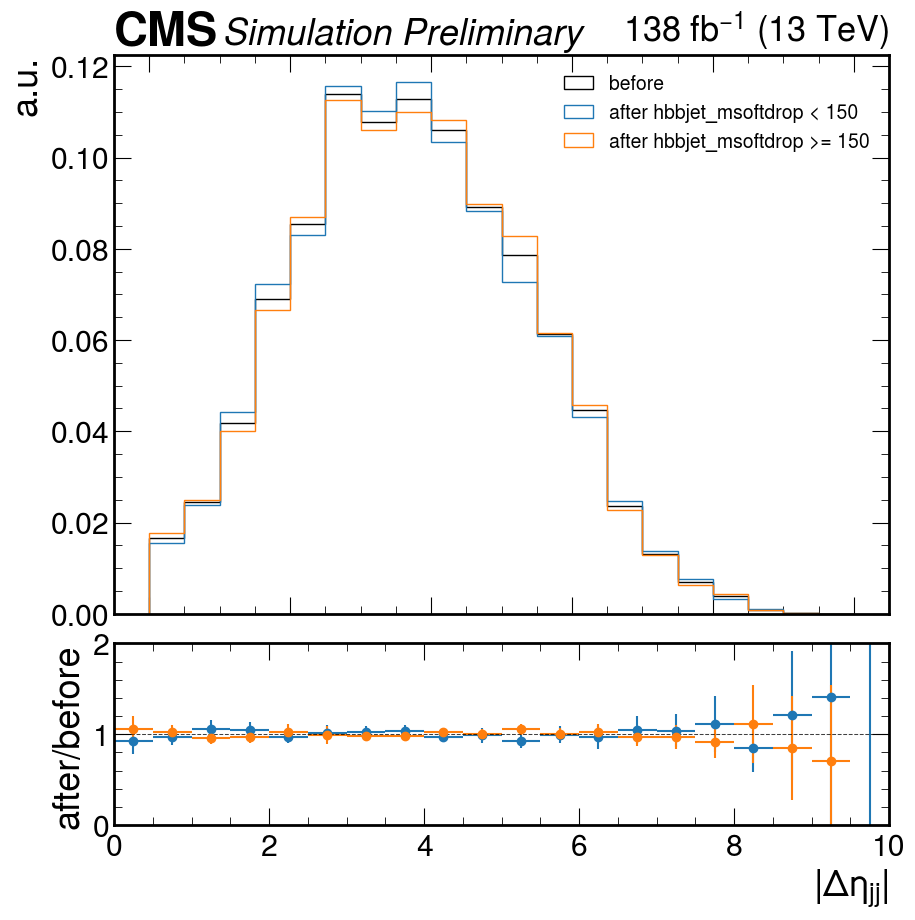

In [7]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 21),  
    selections=[
        "hbbjet_msoftdrop < 150",
        "hbbjet_msoftdrop >= 150"
    ], 
    base_selection="presel_noDetaJJ and M_jj > 600 and ST > 900 and hbbjet_score > 0.9",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

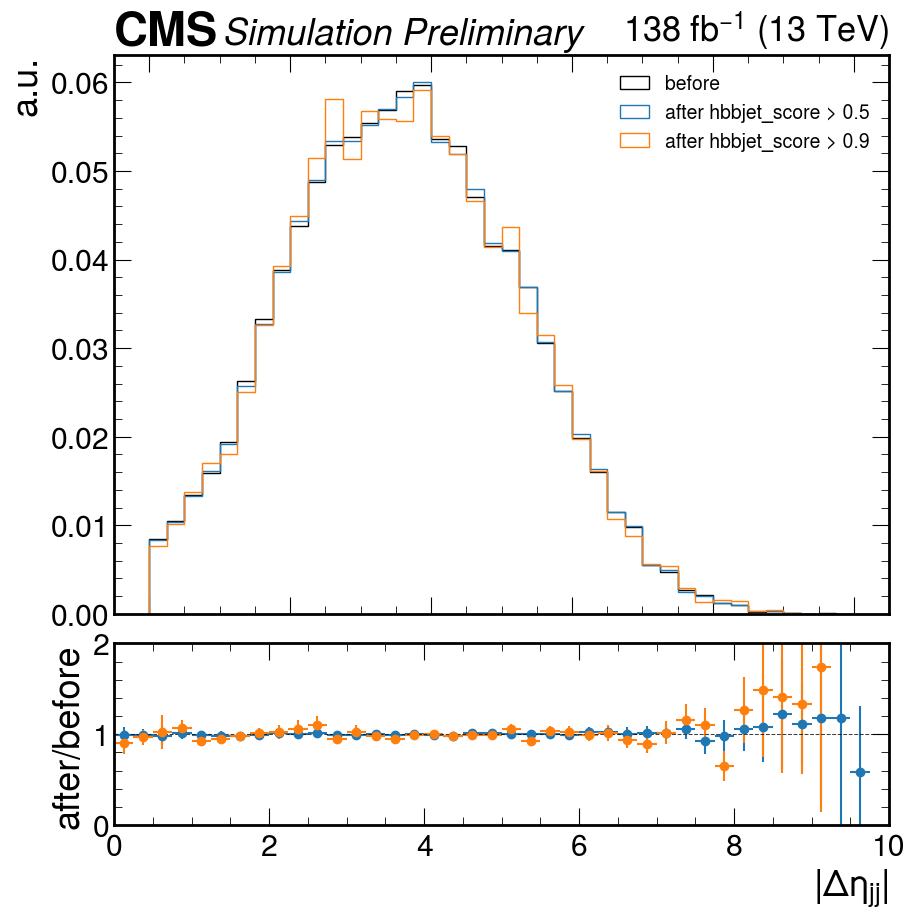

In [8]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 41),  
    selections=[
        "hbbjet_score > 0.5",
        "hbbjet_score > 0.9"
    ], 
    base_selection="presel_noDetaJJ and hbbjet_msoftdrop >= 150",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

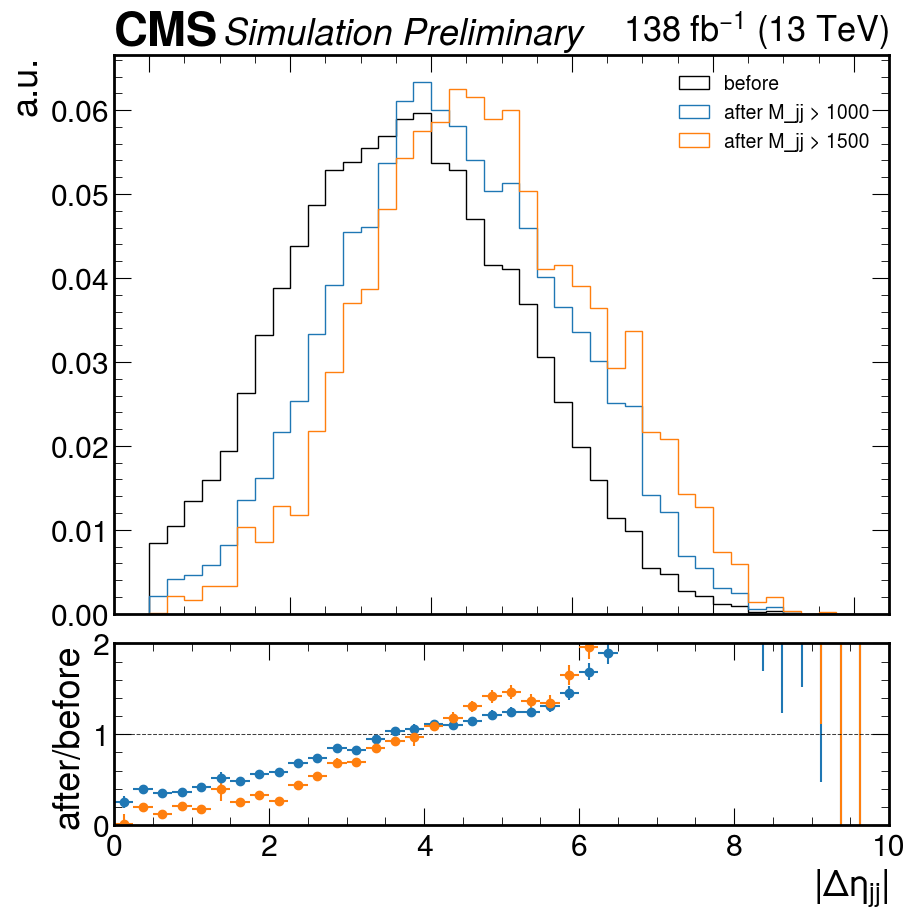

In [9]:
vbswh.plot_correlation(
    "deta_jj", 
    np.linspace(0, 10, 41),  
    selections=[
        "M_jj > 1000",
        "M_jj > 1500"
    ], 
    base_selection="presel_noDetaJJ and hbbjet_msoftdrop >= 150",
    transf=abs,
    x_label=r"$|\Delta\eta_{jj}|$"
);

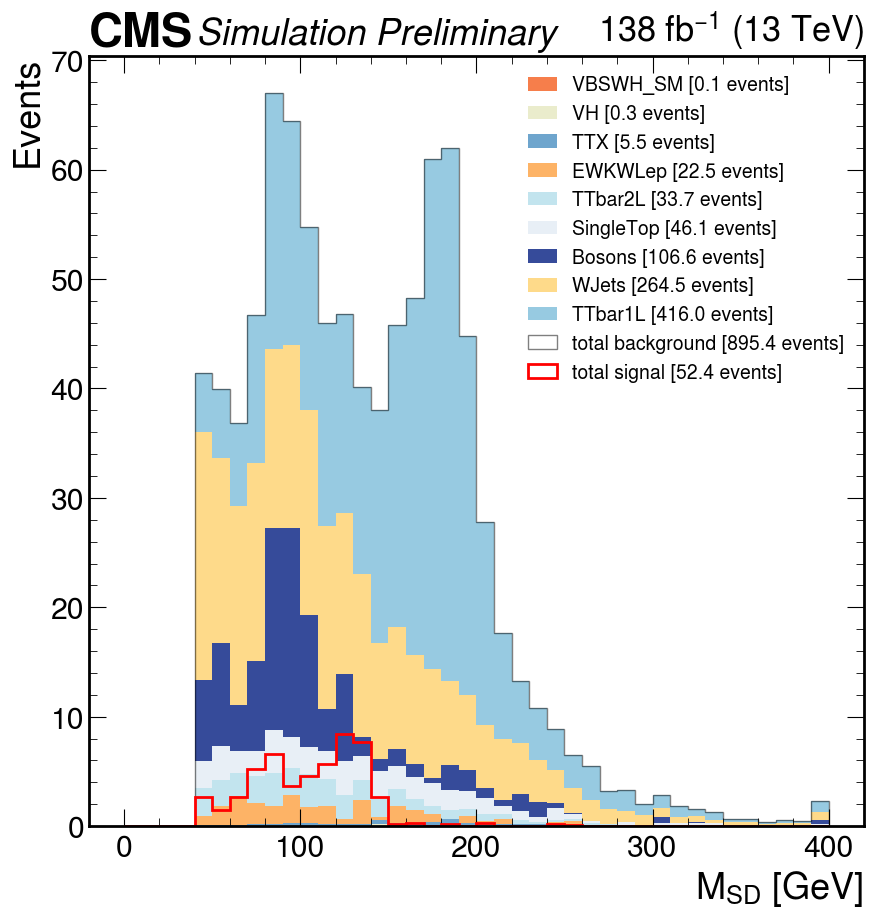

In [10]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel and hbbjet_score < 0.6",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

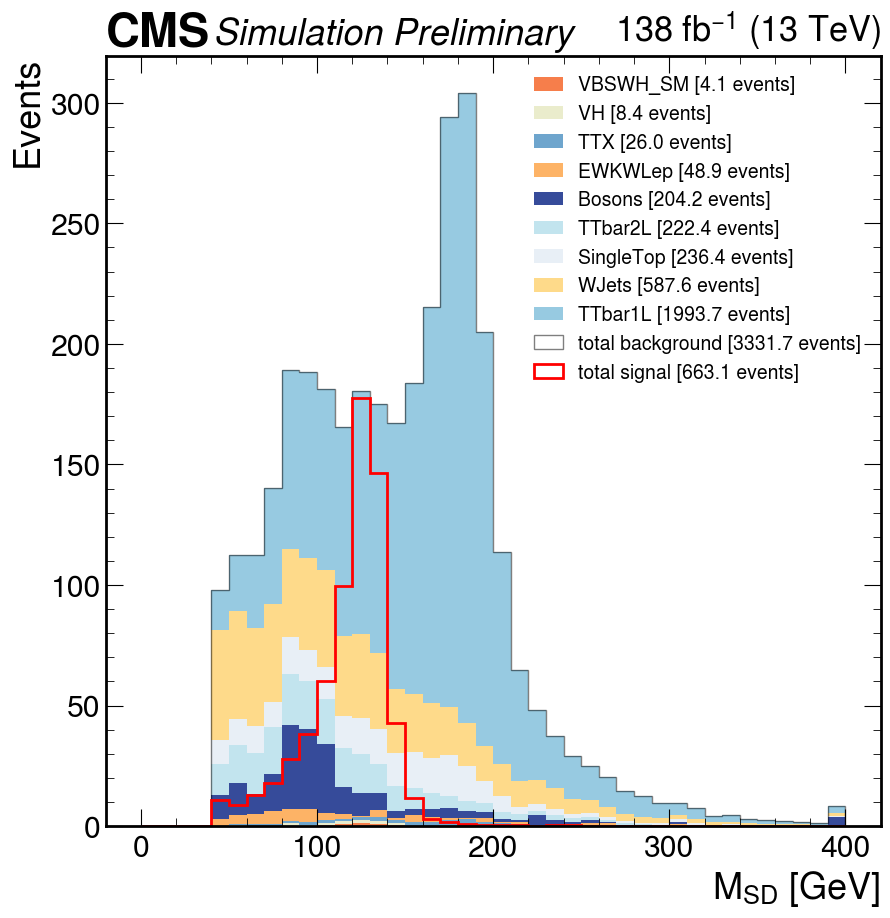

In [11]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

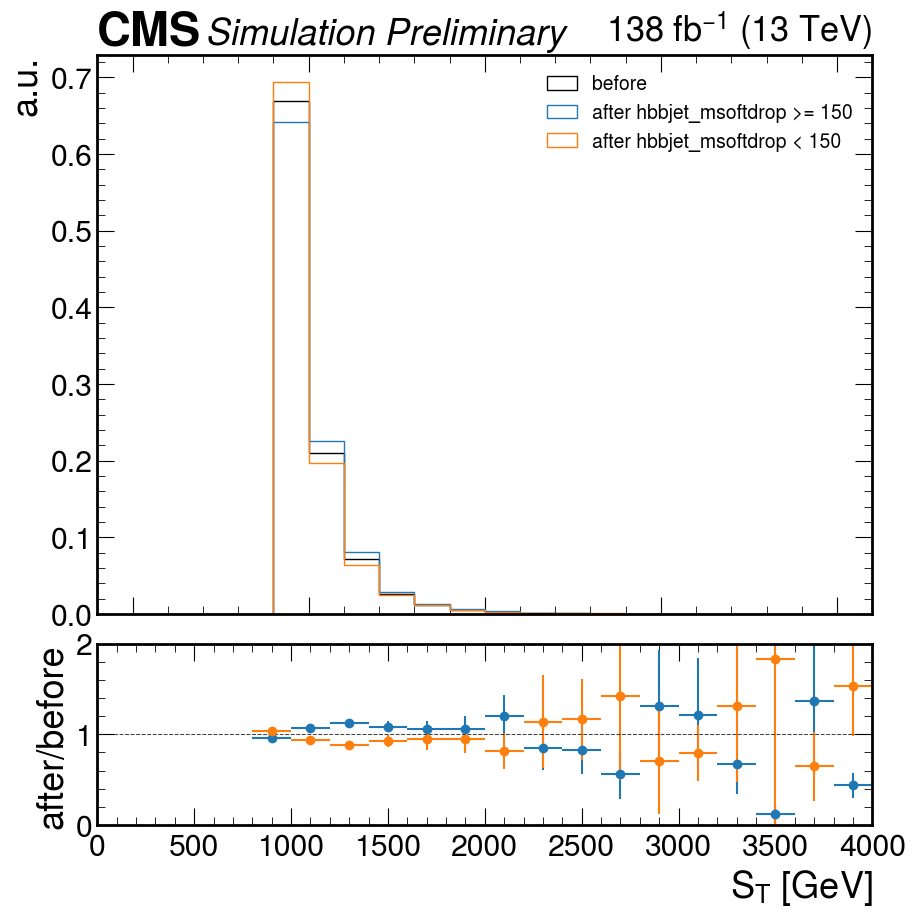

In [12]:
vbswh.plot_correlation(
    "ST", 
    np.linspace(0, 4000, 21),  
    selections=[
        "hbbjet_msoftdrop >= 150",
        "hbbjet_msoftdrop < 150"
    ], 
    base_selection="presel",
    x_label=r"$S_T$ [GeV]"
);

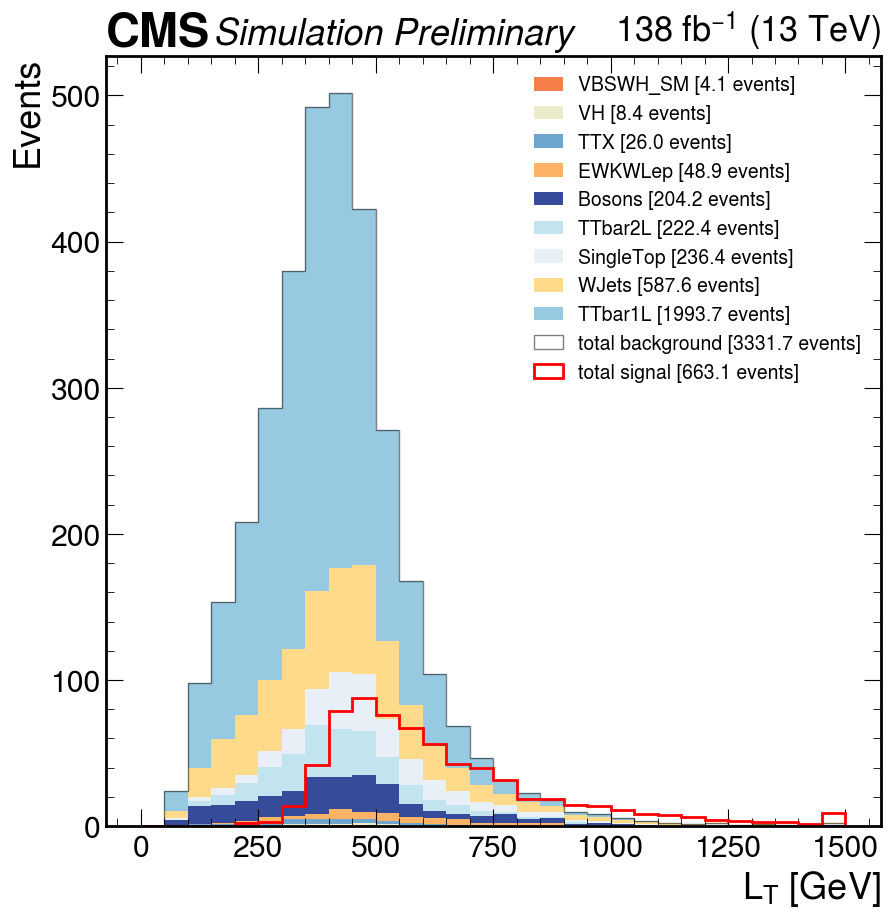

In [13]:
axes = vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1500, 31), 
    selection="presel",
    x_label="$L_T$ [GeV]",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);

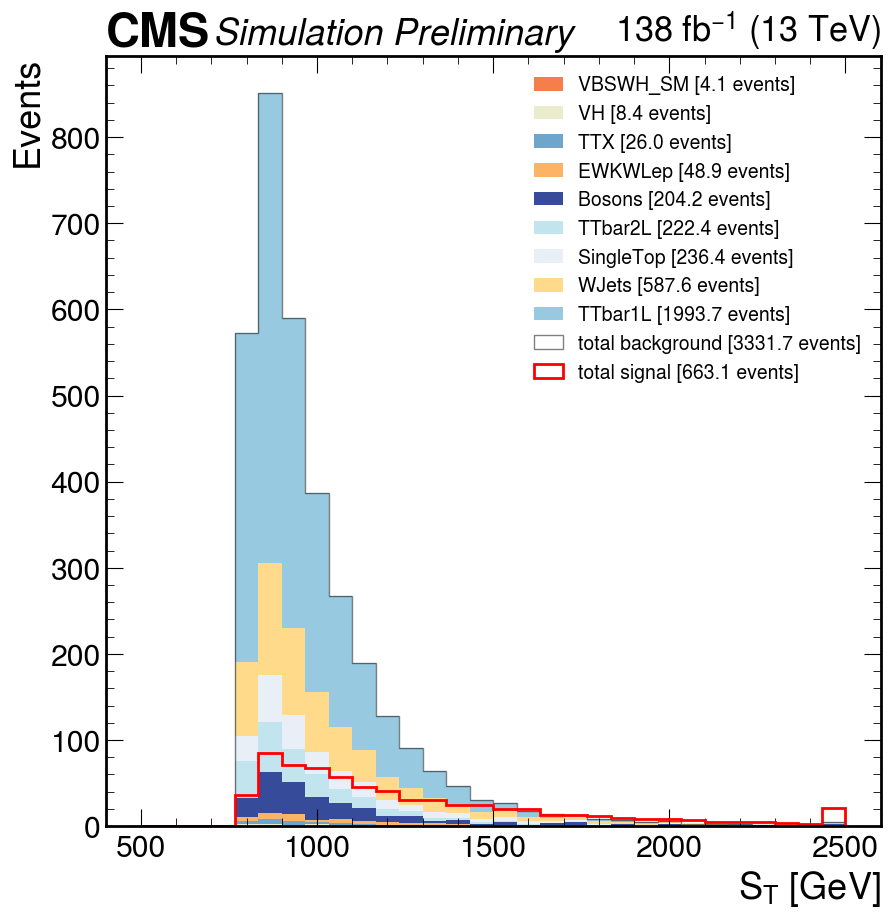

In [30]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(500, 2500, 31), 
    selection="presel",
    x_label="$S_T$ [GeV]",
    stacked=True,
#     logy=True,
#     norm=True
);
axes.set_ylim(ymin=0);

In [15]:
vbswh.get_event_counts(selection="presel and hbbjet_msoftdrop >= 150")

(20.2632373756461, 1621.4417644400387)

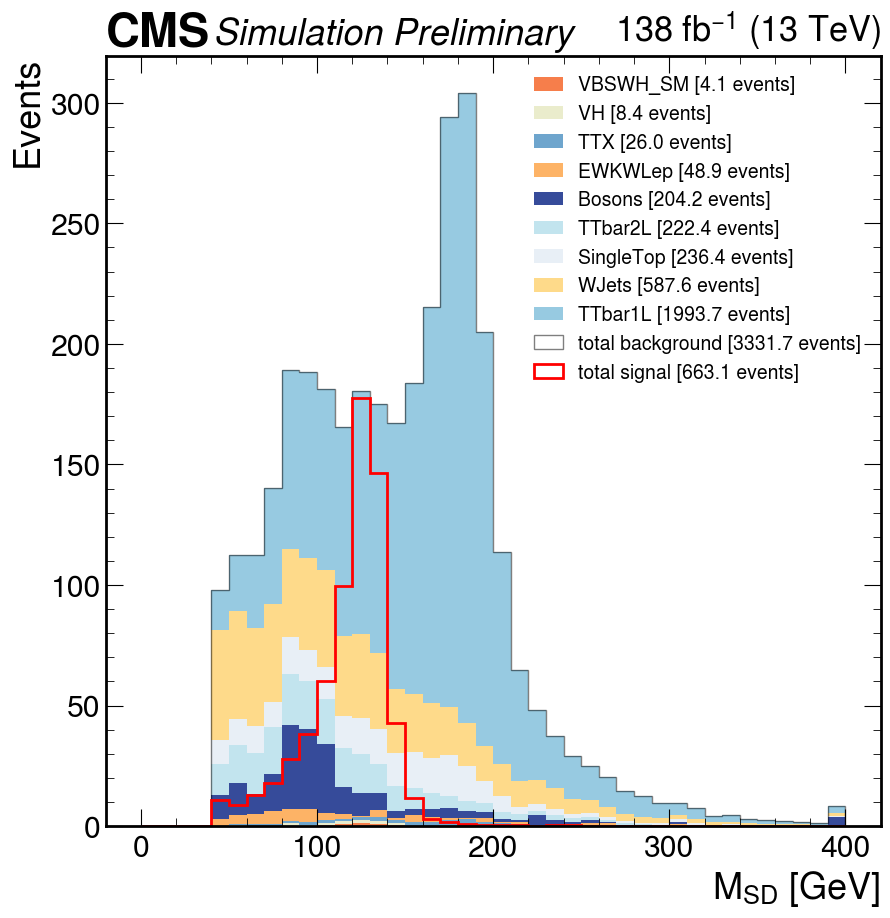

In [16]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_msoftdrop", np.linspace(0, 400, 41), 
    selection="presel",
    x_label="$M_{SD}$ [GeV]",
    stacked=True,
#     norm=True
);
# axes.set_ylim(ymin=0);

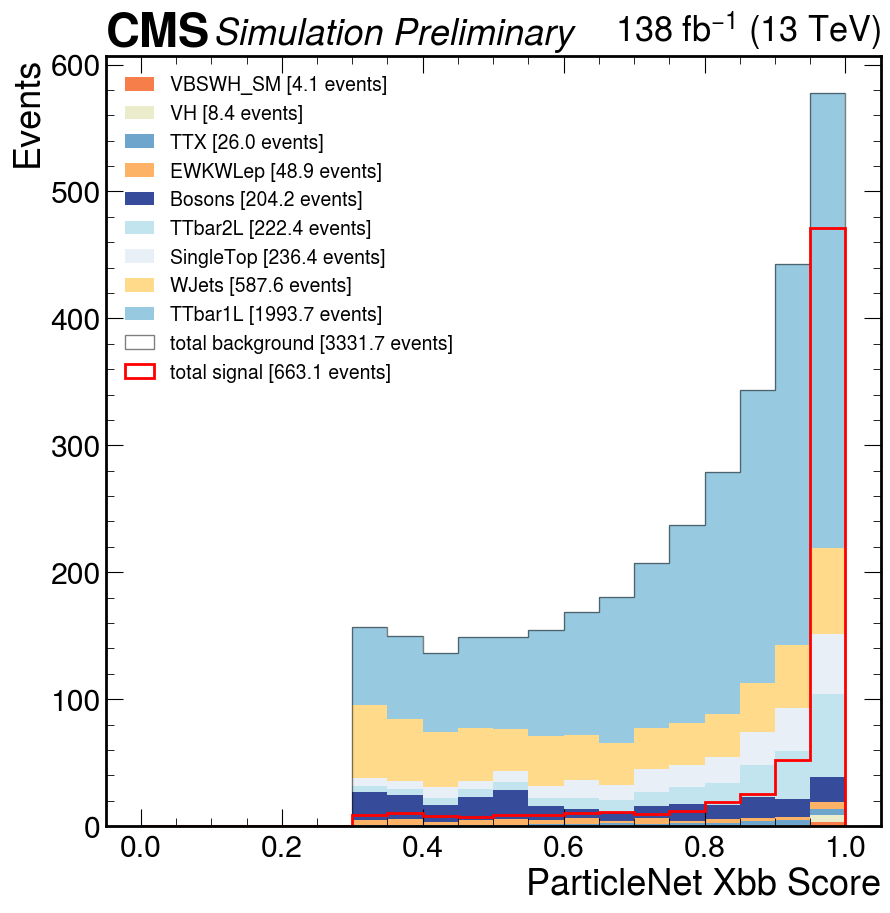

In [17]:
axes = vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0, 1, 21), 
    selection="presel",
    x_label="ParticleNet Xbb Score",
    stacked=True,
#     norm=True
);
axes.set_ylim(ymin=0);
axes.legend(loc=2, fontsize=14);

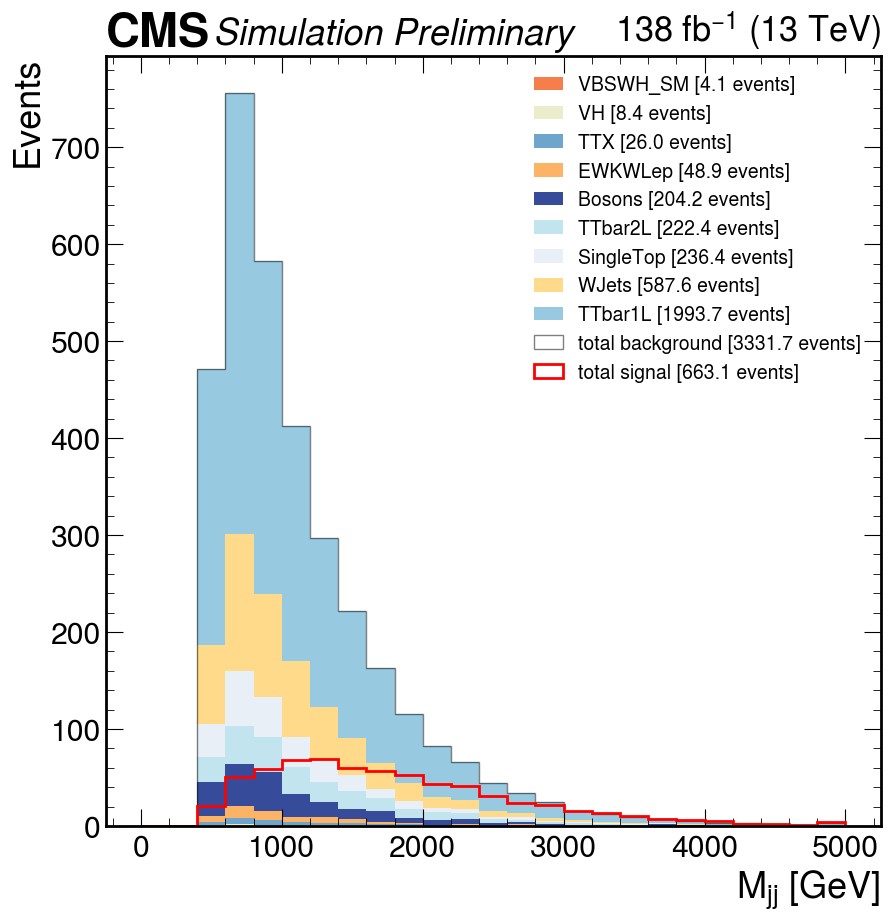

In [18]:
axes = vbswh.plot_sig_vs_bkg(
    "M_jj", np.linspace(0, 5000, 26), 
    selection="presel",
    x_label="$M_{jj}$ [GeV]",
    stacked=True,
#     norm=True,
#     logy=True
);
axes.set_ylim(ymin=0);

In [19]:
vbswh.get_event_counts(selection="presel_noDetaJJ and abs(deta_jj) <= 3")

(7.343327410680907, 1883.6888129244296)

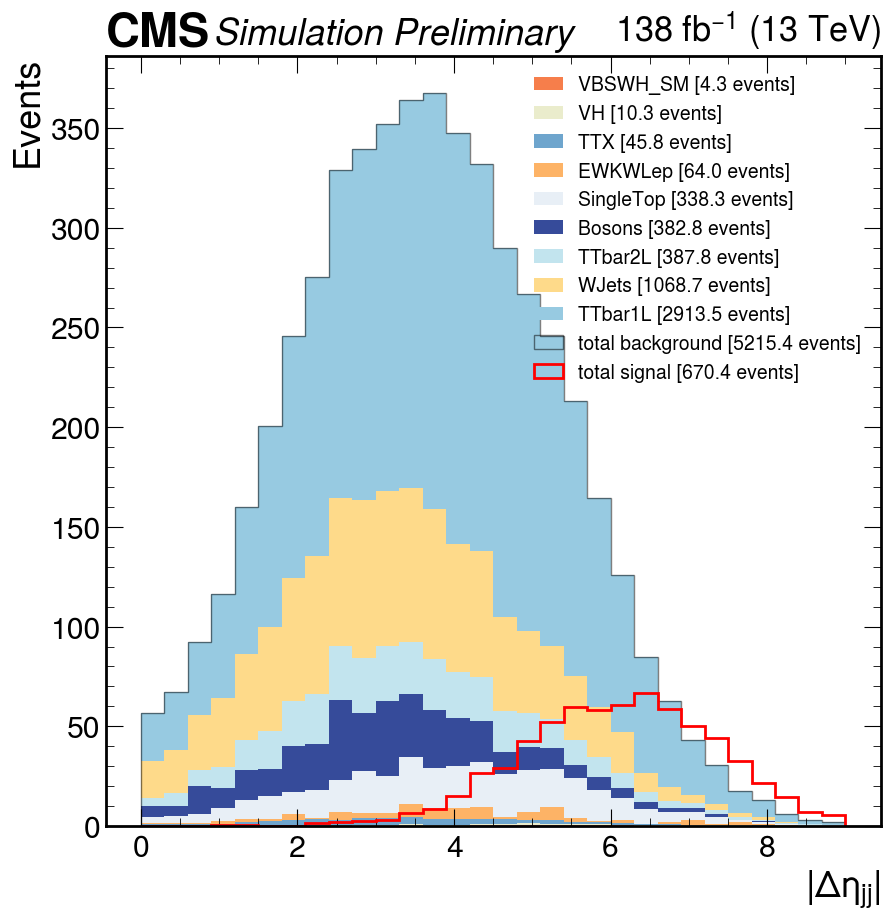

In [20]:
axes = vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 9, 31), 
    selection="presel_noDetaJJ", 
    x_label="$|\Delta\eta_{jj}|$",
    transf=abs,
    stacked=True
);

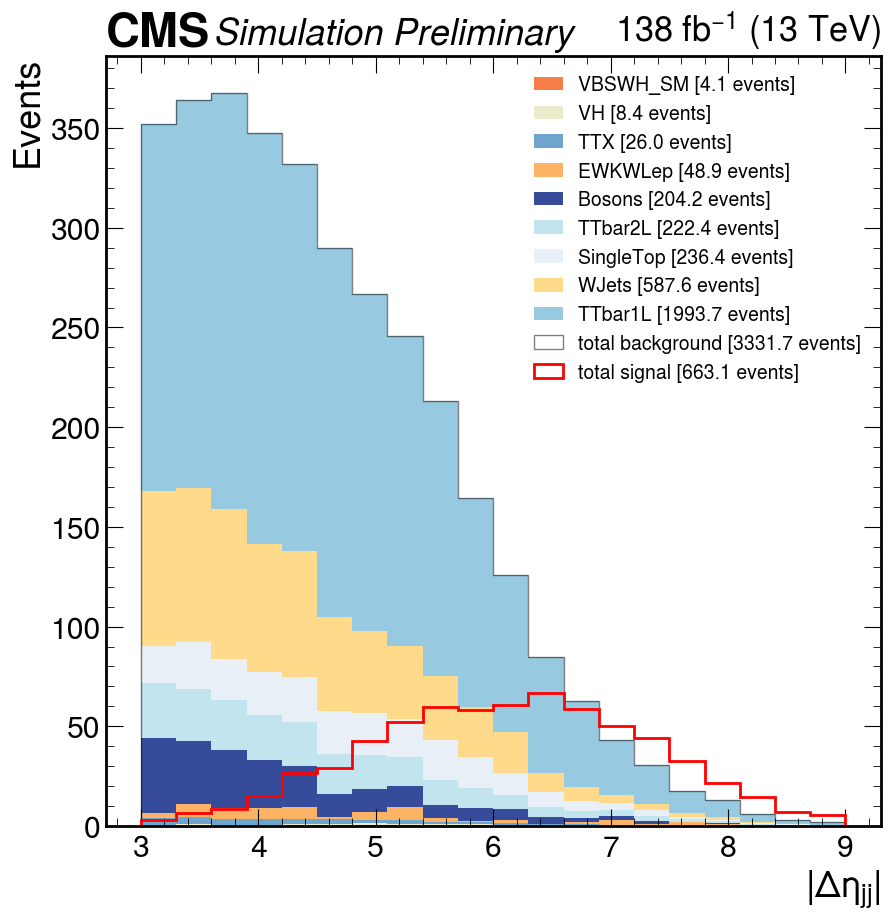

In [21]:
axes = vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(3, 9, 21), 
    selection="presel", 
    x_label="$|\Delta\eta_{jj}|$",
    transf=abs,
    stacked=True
);
# axes.legend(loc=2, fontsize=14);

In [22]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500,588.9590393673953,5484.153014538535,7.952987684348747
M_jj > 1500 and abs(deta_jj) > 3.5,586.8009508306646,4303.425857661834,8.945067999188272
M_jj > 1500 and abs(deta_jj) > 4,582.5790566112729,3777.534398707814,9.478740943480167
M_jj > 1500 and abs(deta_jj) > 4.5,572.5787725400955,3152.233389699873,10.198259549446487
M_jj > 1500 and abs(deta_jj) > 5,553.402964897676,2452.804280446422,11.174035167801637
M_jj > 1500 and abs(deta_jj) > 5.5,515.411955473634,1804.3950914641762,12.13357194813774
M_jj > 1500 and abs(deta_jj) > 6,449.43188464486013,1264.6537495929167,12.63799158650434
M_jj > 1500 and abs(deta_jj) > 6.5,349.4028242724743,850.342330625059,11.98200541650849
M_jj > 1500 and abs(deta_jj) > 7,237.46271563509953,515.9489943448359,10.454229863482228


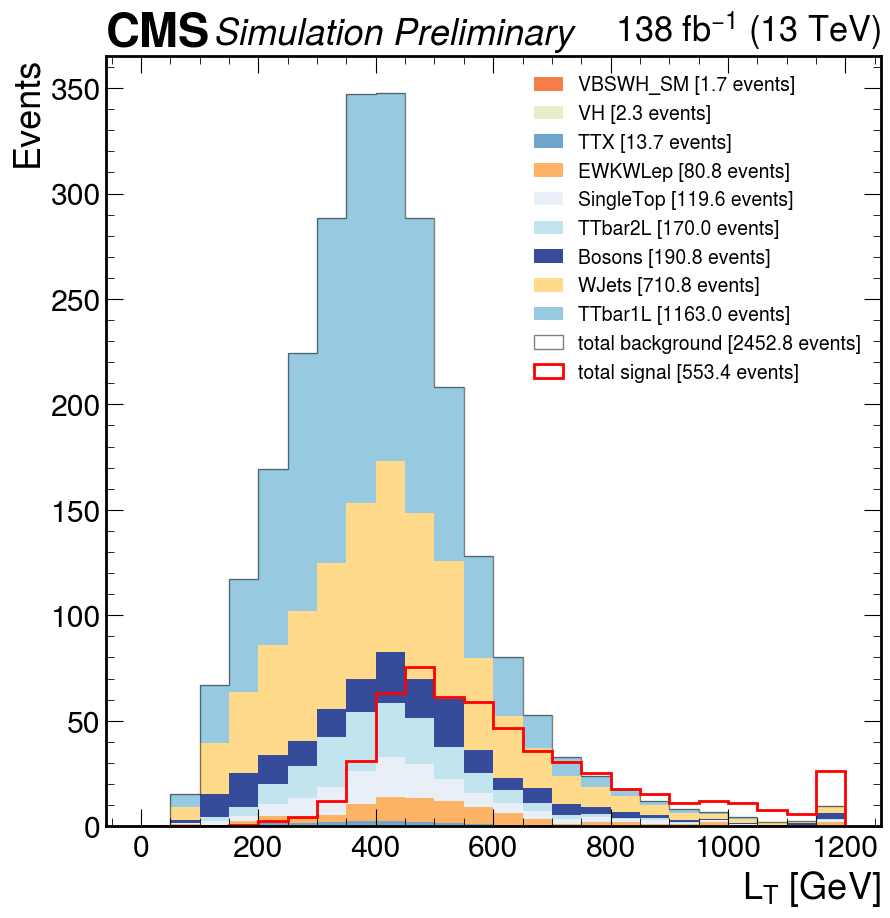

In [23]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", 
    x_label="$L_T$ [GeV]",
    stacked=True
);

In [24]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,553.402964897676,2452.804280446422,11.174035167801637
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,364.2767056739198,587.3761266127748,15.030494010700401
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,244.10625937401355,251.2806938604688,15.39924237017894
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,161.8295090441071,118.58049563955606,14.861104427748245
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,105.92535682647107,61.9273226078605,13.460425345832205
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,73.07531192267605,32.54163799331454,12.810054371205355
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,50.47473539299998,18.03070810196909,11.886874008639072
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,31.673353027084698,11.990874959800779,9.146787809811505
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,21.03240716292643,7.561516178511341,7.64864558960225


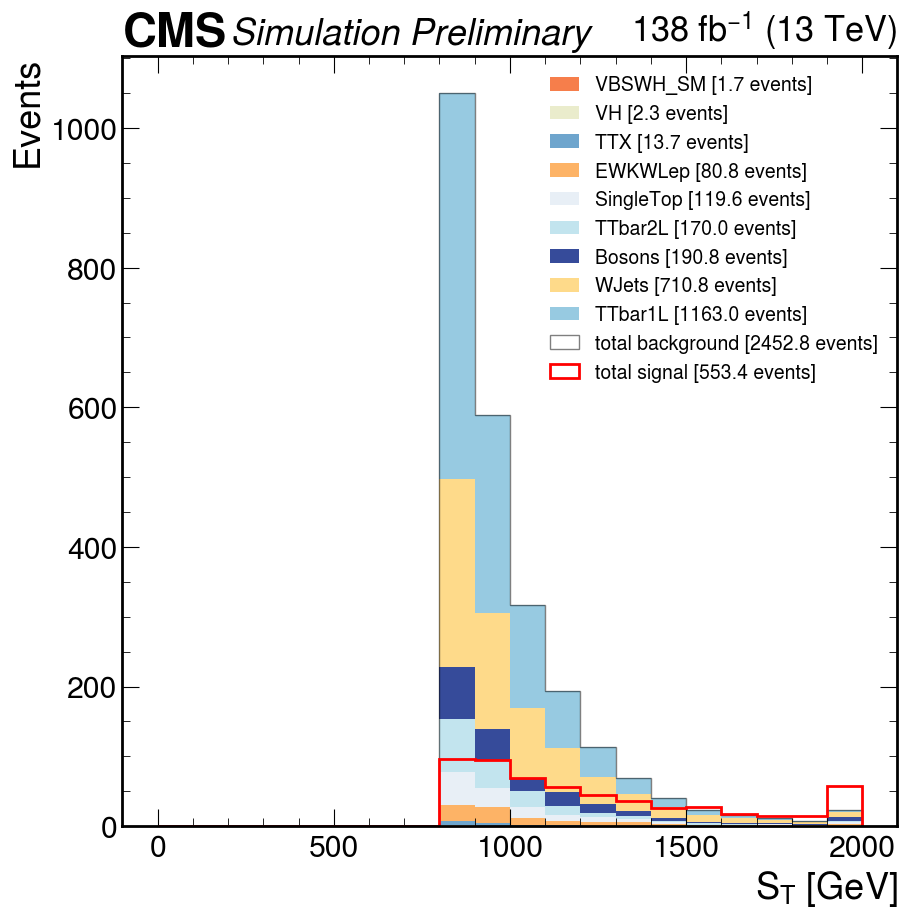

In [25]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", x_label="$S_T$ [GeV]",
    stacked=True
);
axes.set_ylim(ymin=0);

In [26]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1650, 1700, 1800], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5,553.402964897676,2452.804280446422,11.174035167801637
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,363.07075686548103,813.1921486053695,12.731942896587894
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,293.7625131855049,497.03823055712144,13.176542821007002
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,237.40048007425145,303.40031006199973,13.629300993097008
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,192.1247288464117,190.13092017192787,13.933393183418783
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,156.5632106630419,121.56658495834645,14.199812523145953
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,130.03908715690613,81.69164171848074,14.387492167597596
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,103.05604988275728,58.74834112018772,13.445460713353011
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1650,94.28125128323448,50.161006075912795,13.311966575766995
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,85.47410483473374,42.5180

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/yahist/hist1d.py:481: RuntimeWarning: invalid value encountered in multiply
  hnew._counts *= fact
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/yahist/hist1d.py:482: RuntimeWarning: invalid value encountered in multiply
  hnew._errors *= fact


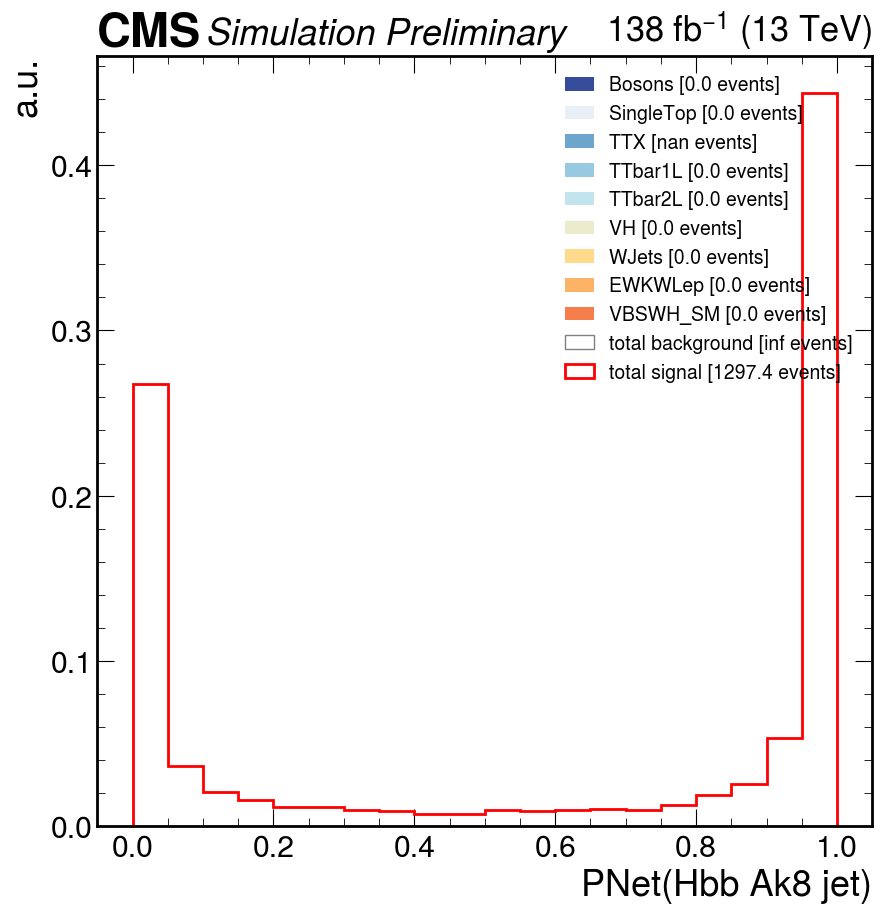

In [27]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0, 1.0, 21), 
#     selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    x_label="PNet(Hbb Ak8 jet)",
    stacked=True,
    norm=True
);

In [28]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,192.1247288464117,190.13092017192787,13.933393183418783
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,101.6324834412894,15.43783566287783,25.866599043176205
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,99.94189552970005,13.86051924143965,26.844655321942433
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,97.90031910343775,12.539074548173215,27.647213429609582
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,96.07118351119948,11.361411272661227,28.50210923956821
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,93.25213185478574,9.91061518385342,29.621596542938306
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,90.18058585111638,8.272943138976672,31.353283733550377
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,85.75247479674032,6.410889383285533,33.8